In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py, glob
import pandas as pd

from ang_res_funcs import *

In [2]:
PARENT_DIRECTORY = '/data/ana/CosmicRay/Anisotropy/IceTop/twelve_year/03_sim_study'
DIRECTS = [f'{PARENT_DIRECTORY}/IT81-2012_orig', f'{PARENT_DIRECTORY}/IT81-2012', f'{PARENT_DIRECTORY}/IT81-2015', f'{PARENT_DIRECTORY}/IT81-2018']
COLORS = ['black', 'green', 'blue', 'red']
LABELS = ['2012 No simweights All Particles', '2012 All Particles', '2015 All Particles', '2018 All Particles']

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/Ubuntu_20.04_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/Ubuntu_20.04_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/Ubuntu_20.04_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/Ubuntu_20.04_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in multiply


3.697139906861665e-05
2.2812773650432943e-05
1.206093010089238e-05
6.850452178178293e-06


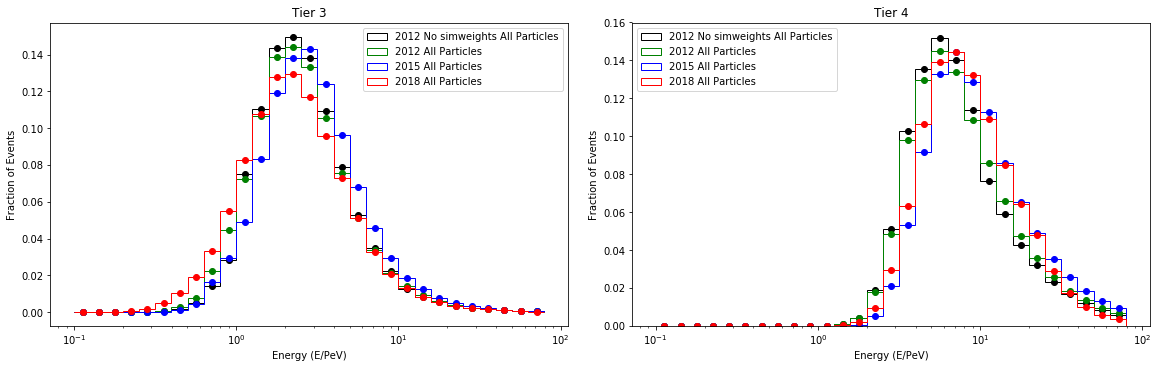

In [3]:
histograms = plt.figure(figsize=(16, 5), constrained_layout=True)
hist_array = histograms.subplots(1, 2, squeeze=False)

hist_array[0,0].set_title('Tier 3')
hist_array[0,0].semilogx()
hist_array[0,0].set_ylabel('Fraction of Events')
hist_array[0,0].set_xlabel('Energy (E/PeV)')

hist_array[0,1].set_title('Tier 4')
hist_array[0,1].semilogx()
hist_array[0,1].set_ylabel('Fraction of Events')
hist_array[0,1].set_xlabel('Energy (E/PeV)')

for i, DIRECT in enumerate(DIRECTS):       
    mc_en_p_t3 = np.load(DIRECT +'/Proton-T3-MC-Energy.npy')
    mc_en_he_t3 = np.load(DIRECT +'/Helium-T3-MC-Energy.npy')
    mc_en_o_t3 = np.load(DIRECT +'/Oxygen-T3-MC-Energy.npy')
    mc_en_fe_t3 = np.load(DIRECT +'/Iron-T3-MC-Energy.npy')
    
    mc_en_p_t4 = np.load(DIRECT +'/Proton-T4-MC-Energy.npy')
    mc_en_he_t4 = np.load(DIRECT +'/Helium-T4-MC-Energy.npy')
    mc_en_o_t4 = np.load(DIRECT +'/Oxygen-T4-MC-Energy.npy')
    mc_en_fe_t4 = np.load(DIRECT +'/Iron-T4-MC-Energy.npy')
    
    mc_w_p_t3 = np.load(DIRECT +'/Proton-T3-MC-Weights.npy')
    mc_w_he_t3 = np.load(DIRECT +'/Helium-T3-MC-Weights.npy')
    mc_w_o_t3 = np.load(DIRECT +'/Oxygen-T3-MC-Weights.npy')
    mc_w_fe_t3 = np.load(DIRECT +'/Iron-T3-MC-Weights.npy')
    
    mc_w_p_t4 = np.load(DIRECT +'/Proton-T4-MC-Weights.npy')
    mc_w_he_t4 = np.load(DIRECT +'/Helium-T4-MC-Weights.npy')
    mc_w_o_t4 = np.load(DIRECT +'/Oxygen-T4-MC-Weights.npy')
    mc_w_fe_t4 = np.load(DIRECT +'/Iron-T4-MC-Weights.npy')
    
    mc_en_t3 = np.concatenate((mc_en_p_t3, mc_en_he_t3, mc_en_o_t3, mc_en_fe_t3), axis=None)
    mc_en_t4 = np.concatenate((mc_en_p_t4, mc_en_he_t4, mc_en_o_t4, mc_en_fe_t4), axis=None)
    
    mc_w_t3 = np.concatenate((mc_w_p_t3, mc_w_he_t3, mc_w_o_t3, mc_w_fe_t3), axis=None)
    mc_w_t4 = np.concatenate((mc_w_p_t4, mc_w_he_t4, mc_w_o_t4, mc_w_fe_t4), axis=None)
    
    bins = 10**(np.arange(-1,2,.1))
    scale = 10**-6

    counts_t3, _ = np.histogram(mc_en_t3 * scale, bins=bins)
    uncertainty_counts_t3 = (1 / np.sqrt(counts_t3)) * counts_t3
    uncertainty_fractions_unweighted_t3 = uncertainty_counts_t3 / sum(counts_t3)    
    
    hist_t3, bin_edges_t3 = np.histogram(mc_en_t3 * scale, bins=bins, weights=mc_w_t3 / sum(mc_w_t3))
    bin_centers_t3 = (bin_edges_t3[:-1] + bin_edges_t3[1:]) / 2
    
    hist_array[0,0].hist(mc_en_t3*scale, bins, weights=mc_w_t3/sum(mc_w_t3), histtype="step", linestyle="solid", color=COLORS[i], label=LABELS[i])
    hist_array[0, 0].errorbar(bin_centers_t3, hist_t3, yerr=uncertainty_fractions_unweighted_t3, fmt='o', color=COLORS[i])      
    hist_array[0,0].legend(loc='upper right')

    counts_t4, _ = np.histogram(mc_en_t4 * scale, bins=bins)
    uncertainty_counts_t4 = (1 / np.sqrt(counts_t4)) * counts_t4
    uncertainty_fractions_unweighted_t4 = uncertainty_counts_t4 / sum(counts_t4)  

    hist_t4, bin_edges_t4 = np.histogram(mc_en_t4 * scale, bins=bins, weights=mc_w_t4 / sum(mc_w_t4))
    bin_centers_t4 = (bin_edges_t4[:-1] + bin_edges_t4[1:]) / 2
    
    hist_array[0,1].hist(mc_en_t4*scale, bins, weights=mc_w_t4/sum(mc_w_t4), histtype="step", linestyle="solid", color=COLORS[i], label=LABELS[i])
    hist_array[0, 1].errorbar(bin_centers_t4, hist_t4, yerr=uncertainty_fractions_unweighted_t4, fmt='o', color=COLORS[i])      
    hist_array[0,1].legend(loc='upper left')
    
    if i == len(DIRECTS) - 1:
        plt.show()